In [1]:
# Logic Gate - AND Gate using Neural Network
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1️⃣ Create dataset
# Inputs (X) and corresponding outputs (y)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [0], [0], [1]])

# 2️⃣ Build Neural Network
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))   # Hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid'))             # Output layer

# 3️⃣ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4️⃣ Train the model
model.fit(X, y, epochs=500, verbose=0)

# 5️⃣ Evaluate model accuracy
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# 6️⃣ Compare predictions with actual outputs
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype(int)

print("\nPredictions vs Actual:")
for i in range(len(X)):
    print(f"Input: {X[i]}  Predicted: {predicted_classes[i][0]}  Actual: {y[i][0]}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Predictions vs Actual:
Input: [0 0]  Predicted: 0  Actual: 0
Input: [0 1]  Predicted: 0  Actual: 0
Input: [1 0]  Predicted: 0  Actual: 0
Input: [1 1]  Predicted: 1  Actual: 1


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


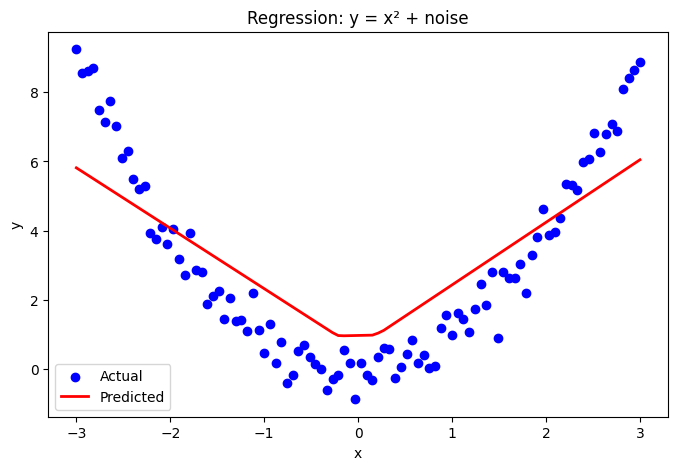

In [2]:
# Regression Task: y = x² + noise
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1️⃣ Generate dataset
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = X**2 + np.random.normal(0, 0.5, X.shape)   # Add Gaussian noise

# Reshape for Keras (expects 2D inputs)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# 2️⃣ Build Neural Network
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))   # Hidden layer (10 neurons)
model.add(Dense(1))                                   # Output layer (regression)

# 3️⃣ Compile and Train
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

# 4️⃣ Make Predictions
y_pred = model.predict(X)

# 5️⃣ Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Actual', color='blue')
plt.plot(X, y_pred, label='Predicted', color='red', linewidth=2)
plt.title("Regression: y = x² + noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


SIGMOID → Accuracy: 100.00%, Final Loss: 0.0031
TANH → Accuracy: 100.00%, Final Loss: 0.0002
RELU → Accuracy: 100.00%, Final Loss: 0.0007


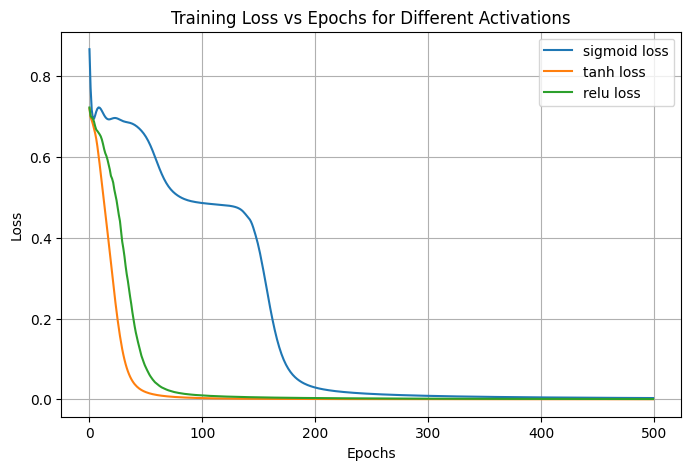

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1️⃣ Create XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# 2️⃣ Function to build, train, and evaluate a model
def train_xor_model(activation, epochs=500):
    model = Sequential([
        Dense(4, input_dim=2, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.1),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X, y, epochs=epochs, verbose=0)
    loss, acc = model.evaluate(X, y, verbose=0)
    return model, history, loss, acc

# 3️⃣ Train with different activation functions
activations = ['sigmoid', 'tanh', 'relu']
results = {}

for act in activations:
    model, history, loss, acc = train_xor_model(act)
    results[act] = {'loss': loss, 'acc': acc, 'history': history}
    print(f"{act.upper()} → Accuracy: {acc*100:.2f}%, Final Loss: {loss:.4f}")

# 4️⃣ Plot training loss comparison
plt.figure(figsize=(8,5))
for act in activations:
    plt.plot(results[act]['history'].history['loss'], label=f'{act} loss')
plt.title("Training Loss vs Epochs for Different Activations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Test Accuracy: 98.25%
Loss: 0.0782


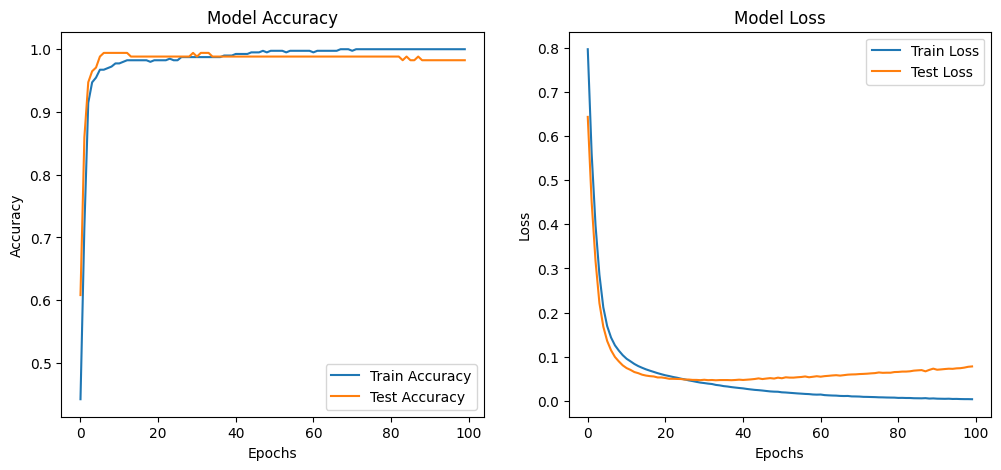

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Class: Benign


In [4]:
# Breast Cancer Classification with Neural Network
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1️⃣ Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# 2️⃣ Split into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Normalize (Standardize) data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Build Neural Network
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),  # hidden layer 1
    Dense(8, activation='relu'),                        # hidden layer 2
    Dense(1, activation='sigmoid')                      # output layer
])

# 5️⃣ Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6️⃣ Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=16, verbose=0)

# 7️⃣ Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"Loss: {loss:.4f}")

# 8️⃣ Plot Accuracy and Loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# 9️⃣ Example Prediction
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)
print(f"Predicted Class: {'Benign' if prediction[0][0] > 0.5 else 'Malignant'}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Test Accuracy: 97.78%
Loss: 0.0953


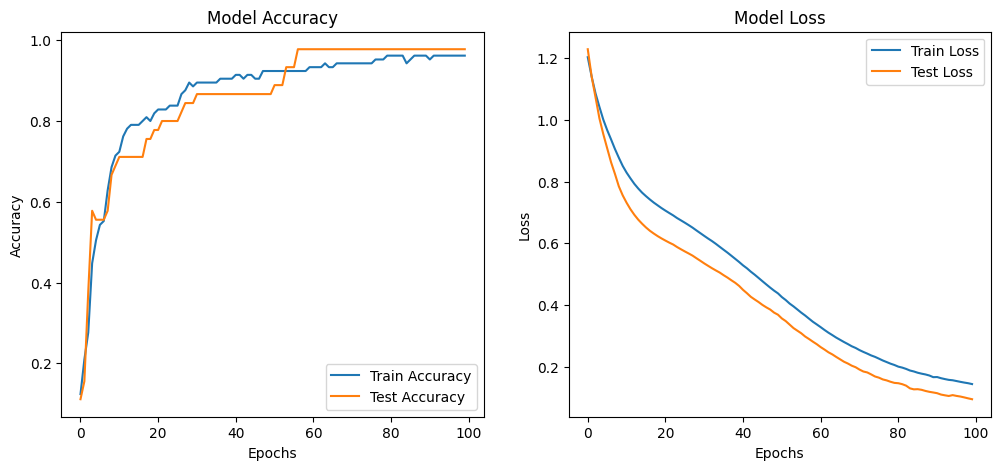

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Species: setosa


In [5]:
# Iris Flower Classification using Neural Network
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1️⃣ Load Dataset
iris = load_iris()
X = iris.data                     # Features: sepal/petal length & width
y = iris.target                   # Target: 0 = setosa, 1 = versicolor, 2 = virginica

# 2️⃣ One-hot encode the labels (for 3-class classification)
y_encoded = to_categorical(y)

# 3️⃣ Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# 4️⃣ Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Build Neural Network
model = Sequential([
    Dense(8, input_dim=4, activation='relu'),   # hidden layer 1
    Dense(6, activation='relu'),                # hidden layer 2
    Dense(3, activation='softmax')              # output layer (3 neurons = 3 classes)
])

# 6️⃣ Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7️⃣ Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=8, verbose=0)

# 8️⃣ Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"Loss: {loss:.4f}")

# 9️⃣ Plot Accuracy & Loss curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 🔟 Test on a sample
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example: Setosa
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
predicted_class = np.argmax(prediction)
print(f"Predicted Species: {iris.target_names[predicted_class]}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Test MAE (Mean Absolute Error): 0.345
Test MSE: 0.262


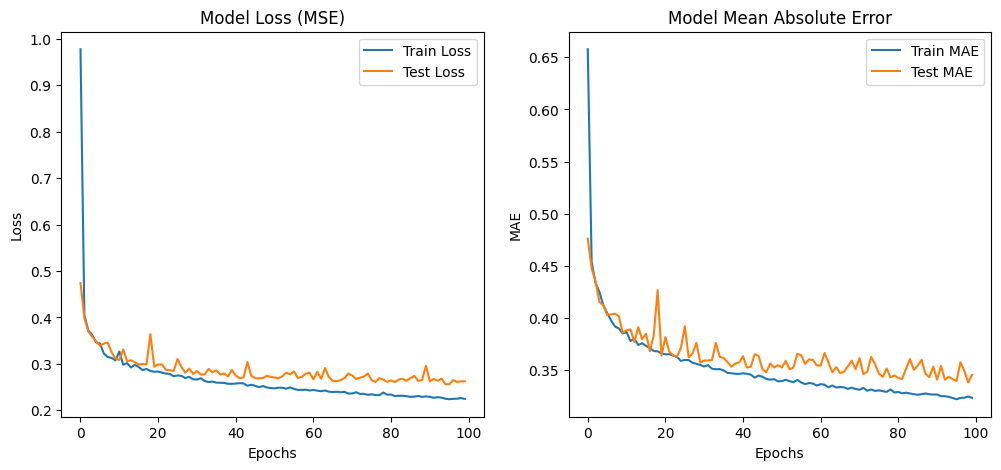

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Price: $50448.07


In [6]:
# California Housing Price Prediction using Neural Network
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1️⃣ Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target   # Median house value (in 100,000s)

# 2️⃣ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Normalize (standardize) data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Build Neural Network
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),                        # Hidden layer 2
    Dense(1)                                             # Output layer (regression)
])

# 5️⃣ Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # MSE: Mean Squared Error, MAE: Mean Absolute Error

# 6️⃣ Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, verbose=0)

# 7️⃣ Evaluate model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test MAE (Mean Absolute Error): {mae:.3f}")
print(f"Test MSE: {loss:.3f}")

# 8️⃣ Plot training curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# 9️⃣ Example prediction
sample = X_test[0].reshape(1, -1)
predicted_price = model.predict(sample)[0][0]
print(f"Predicted Price: ${predicted_price * 100000:.2f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8350 - loss: 0.5230 - val_accuracy: 0.9668 - val_loss: 0.1107
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9608 - loss: 0.1280 - val_accuracy: 0.9717 - val_loss: 0.0834
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9720 - loss: 0.0910 - val_accuracy: 0.9755 - val_loss: 0.0757
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9777 - loss: 0.0695 - val_accuracy: 0.9779 - val_loss: 0.0641
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9820 - loss: 0.0575 - val_accuracy: 0.9809 - val_loss: 0.0631
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9843 - loss: 0.0492 - val_accuracy: 0.9805 - val_loss: 0.0640
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9861 - loss: 0.0426 - val_accuracy: 0.9821 - val_loss: 0.0584
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10

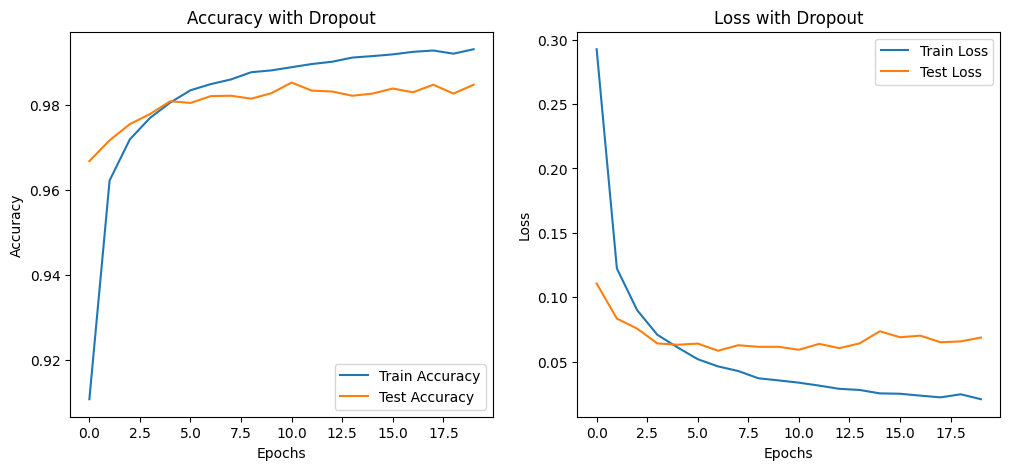

In [7]:
# Preventing Overfitting using Dropout on MNIST Dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# 1️⃣ Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255) to range [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot encode labels (digits 0–9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2️⃣ Build Neural Network with Dropout
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dropout(0.3),                   # 30% of neurons randomly dropped
    Dense(256, activation='relu'),
    Dropout(0.3),                   # another Dropout layer
    Dense(10, activation='softmax') # output layer (10 classes)
])

# 3️⃣ Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4️⃣ Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)

# 5️⃣ Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# 6️⃣ Plot training and validation curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
